In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt ## Visualizing the data
%matplotlib inline

In [ ]:
## if getting encoding error then use below line (error: 'utf-8', codec can't decode byte 0xe0 in position 0:  )
## dfpd.read_csv("filename", encoding='unicode_escape')

In [ ]:
df = pd.read_csv(r"D:\DESKTOPFILES\suraj\power-bi\madhav power bi full course\project 3 python\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv",encoding="unicode_escape")

# To Avoid encoding error, use 'unicode_escape'

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
## Drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [ ]:
df.info()

In [ ]:
## Check for null values
pd.isnull(df).sum()


In [ ]:
## drop null values

df.dropna(inplace=True)

In [ ]:
pd.isnull(df).sum()

In [ ]:
## Initialize list of lists

data_test = [['madhav', 11], ['Gopi', 15], ['Keshav', ], ['Lalita', 16]]

## Create the pandas DataFrame using list 
df_test = pd.DataFrame(data_test, columns=['Name', 'Age'])

df_test

In [ ]:
df_test.dropna(inplace=True)

In [ ]:
df_test

In [ ]:
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

In [ ]:
df.columns

In [ ]:
# Rename column
df.rename(columns= {'Marital_Status':'Shaadi'})


In [ ]:
# Describe() method returns descriptions of the data in the DataFrame (i.e, count, mean, std, etc)

df.describe()

In [ ]:
## Use Describe() for Specific Columns
df[['Age', 'Orders', 'Amount']].describe()


# Exploratory Data Analysis

 Gender

In [ ]:
ax = sns.countplot(x = 'Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x = 'Gender',y= 'Amount', data= sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

# Age

In [ ]:
ax = sns.countplot(data=df, x= 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount', data = sales_age)

|From Above Graphs we can see that most of the buyers are of the age group between 26-35 years female


# State

<AxesSubplot:xlabel='State', ylabel='Orders'>

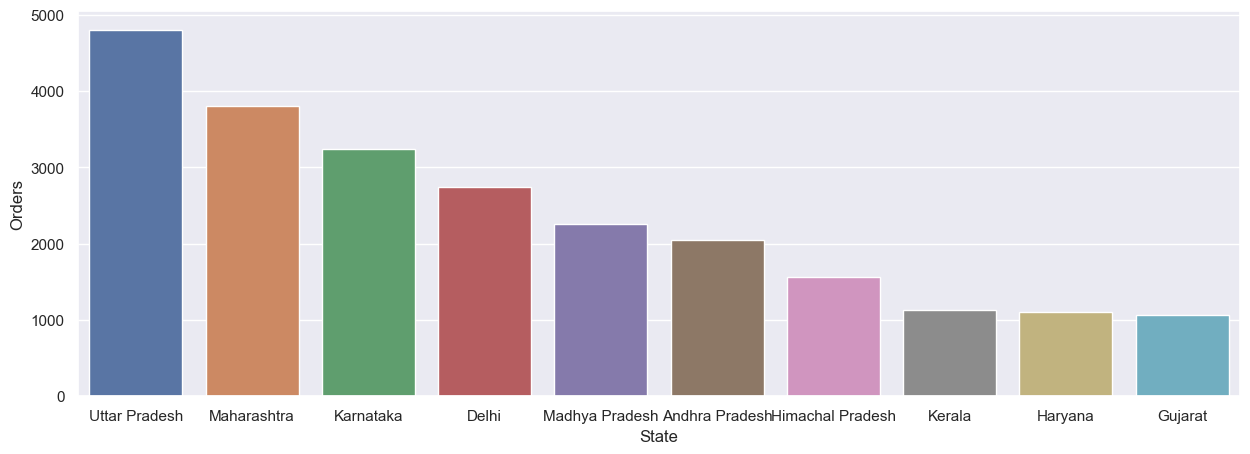

In [45]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'],  as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

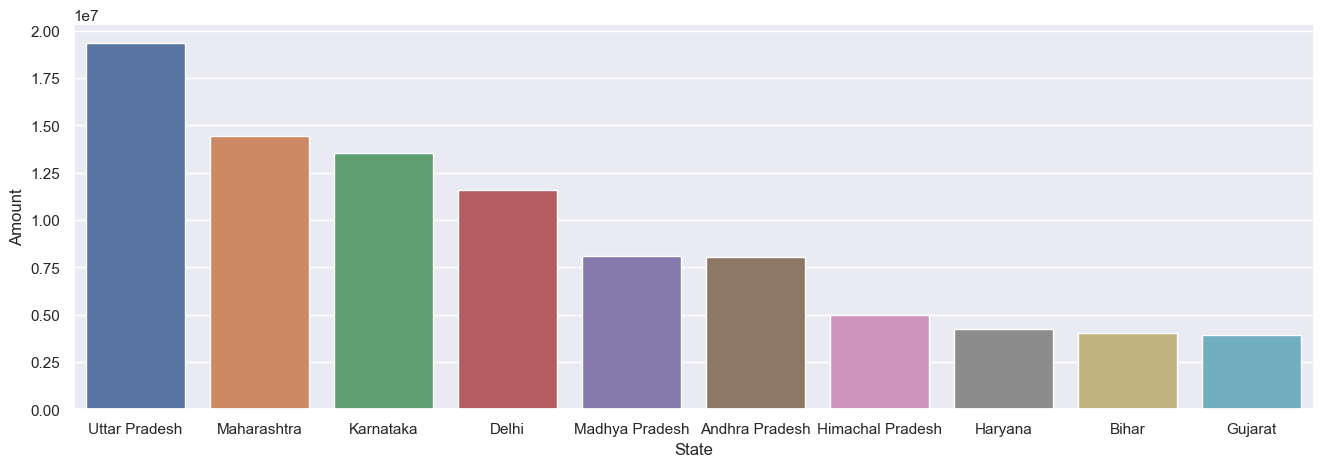

In [47]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'],  as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

From Above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively but total sales/amount
is from UP, karnataka and then Maharashtra

# Marital Status

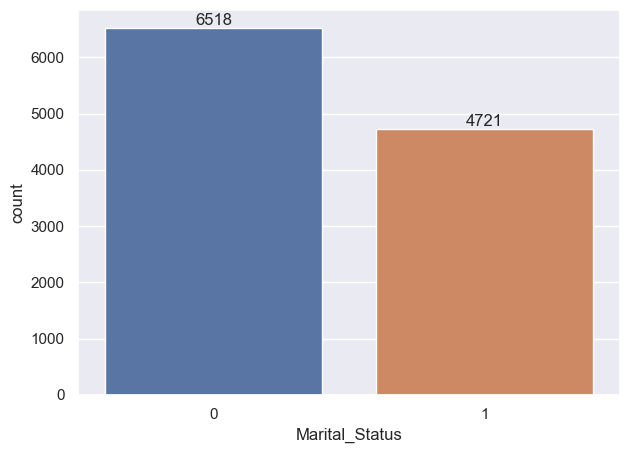

In [51]:
ax = sns.countplot(data=df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

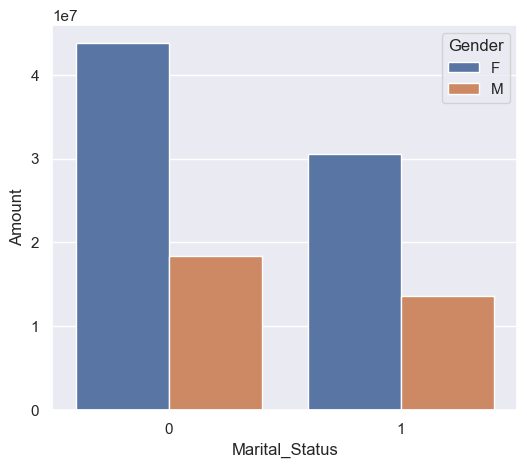

In [56]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

 From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

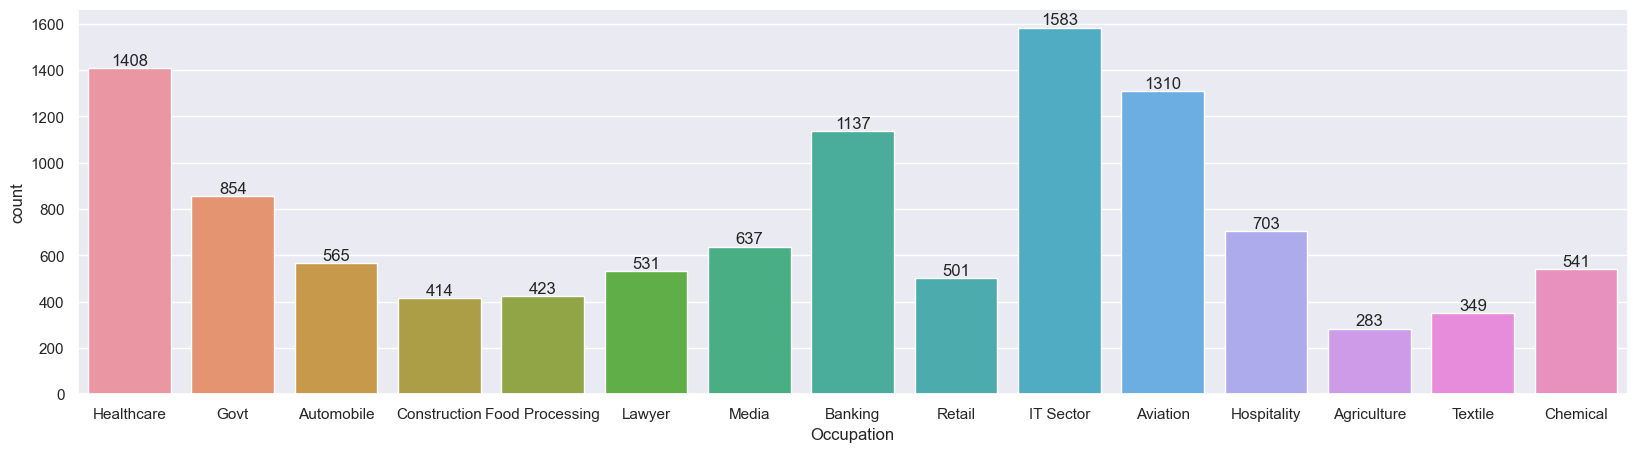

In [60]:
sns.set(rc={"figure.figsize":(20,5)})
ax = sns.countplot(data = df, x = "Occupation")

for bars in ax.containers:
    ax.bar_label(bars)



<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

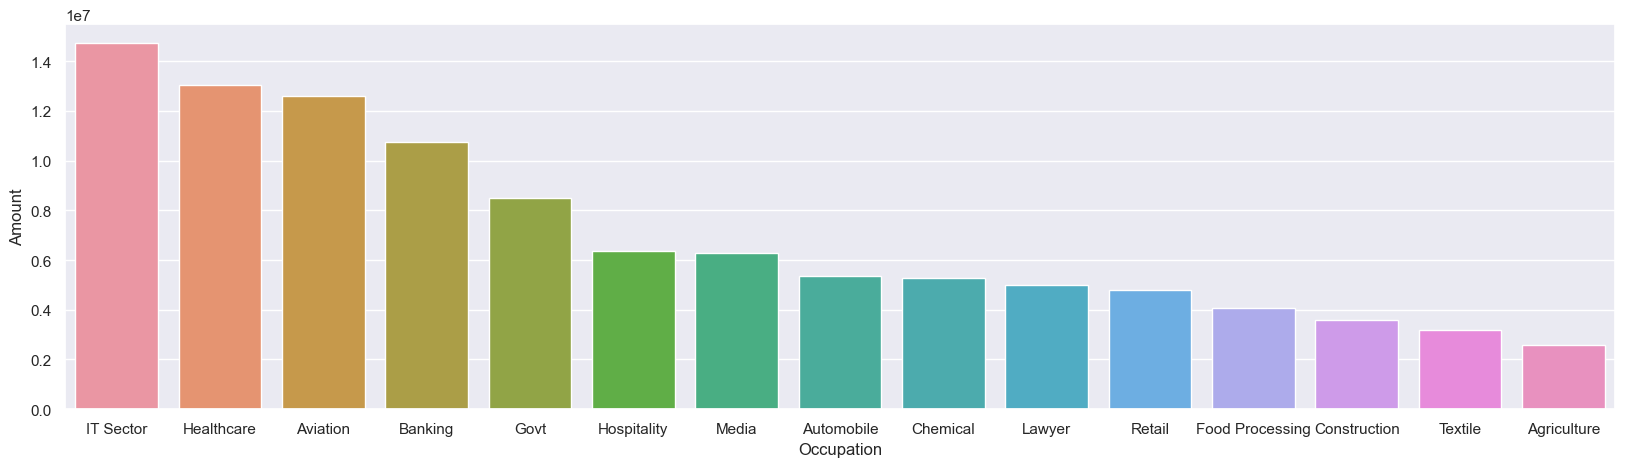

In [61]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data = sales_state, x = "Occupation",y= "Amount")

From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare sector

In [62]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product Category

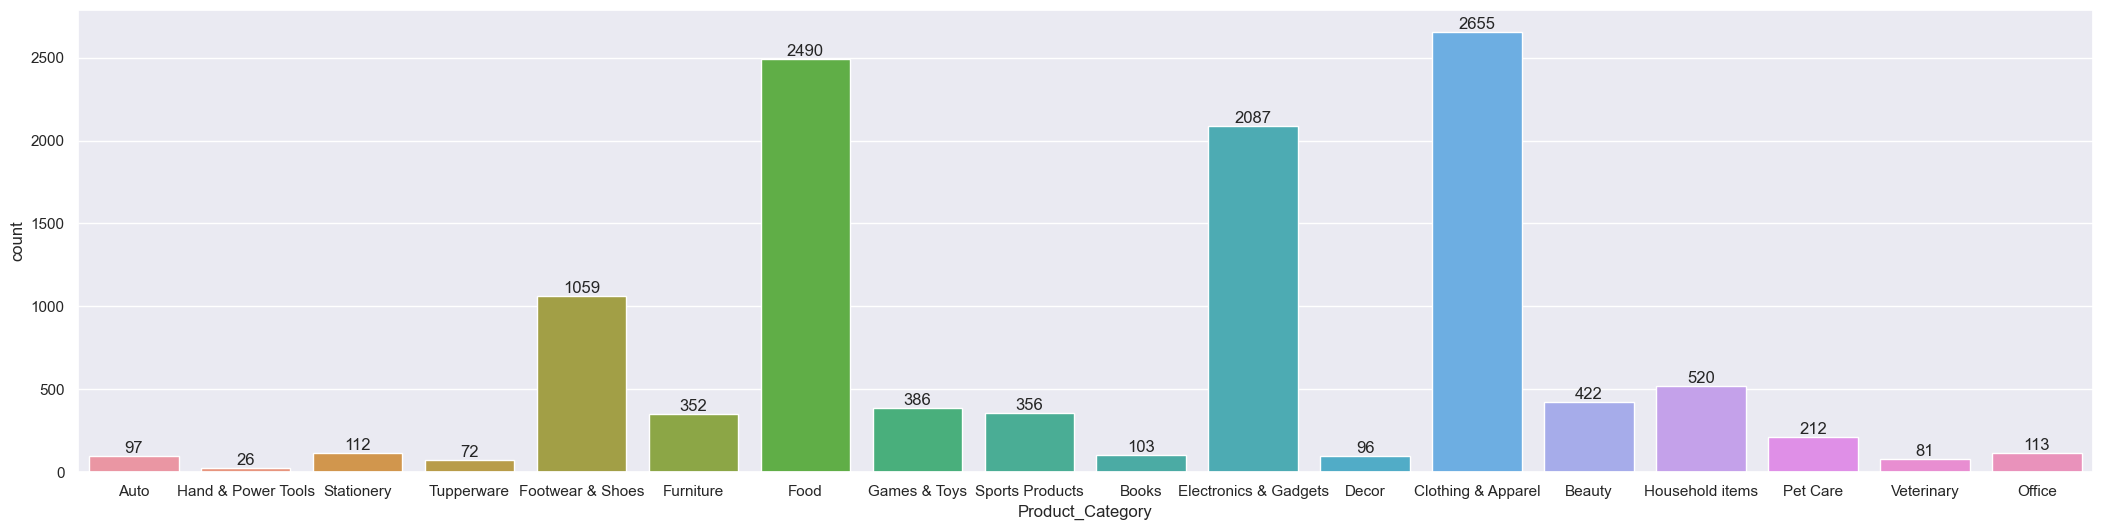

In [66]:
sns.set(rc={"figure.figsize":(26,6)})
ax = sns.countplot(data = df, x = "Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

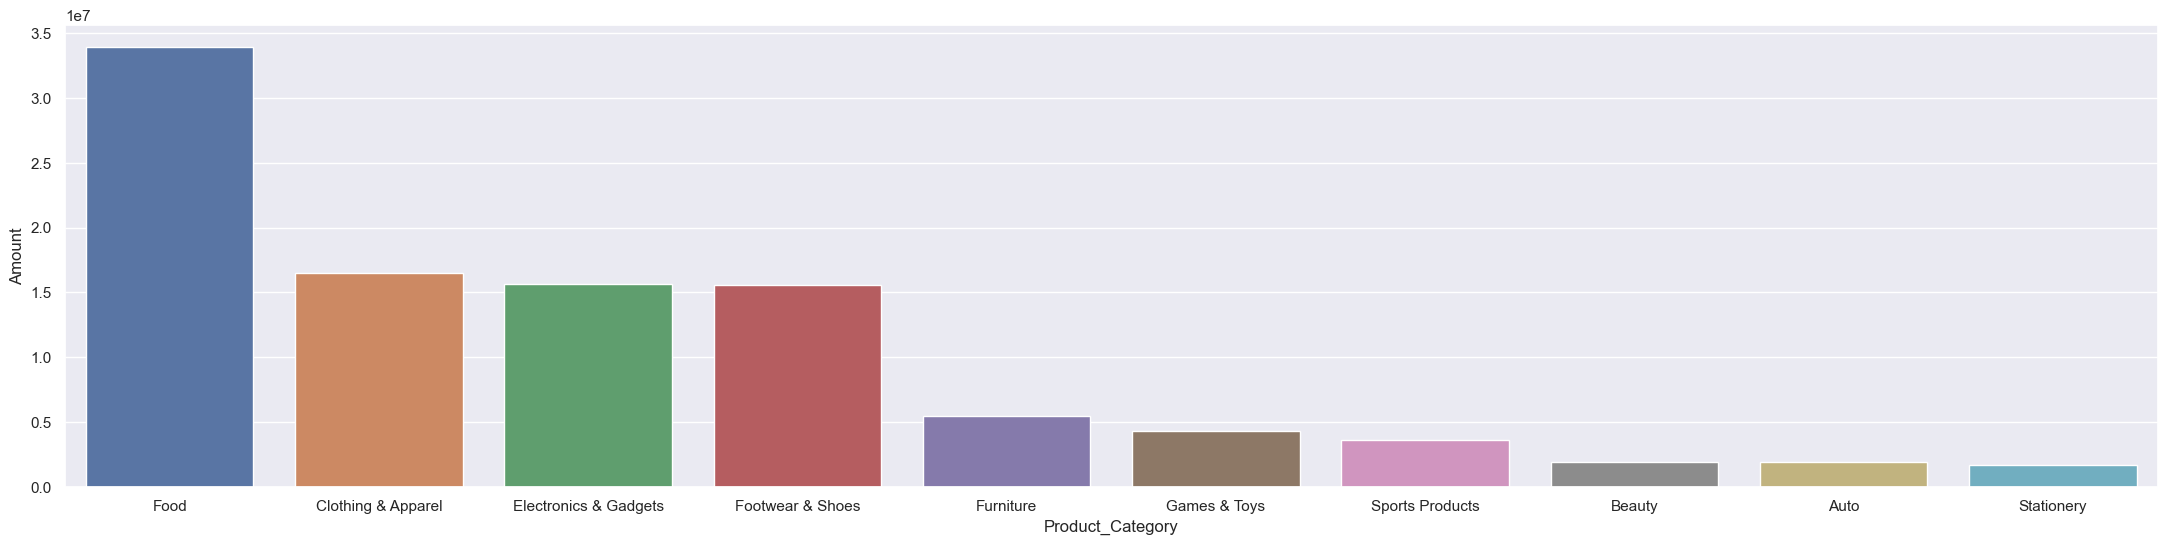

In [72]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(27,6)})
sns.barplot(data = sales_state, x = 'Product_Category',y= "Amount")

From above graphs we can see that most of the sold products are from food, footwear and Electronics category

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

In [ ]:
# Top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplot(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:

Married Women age group 26-35 years from UP, Maharashtra and Karnataka Working in IT, Aviation and Healthcare are more likely to buy products from food Clothing and Electronics category